In [4]:
# Click into this cell and press shift-enter before using this notebook.
# This line loads the ability to use %%ai in your file
%load_ext jupyter_ai_magics
# These lines import the Python modules we commonly use in CMPSC 5A
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots

# Lecture 8, CMPSC 5A, S25

Thu 04/24/2025, Week 4

### Note to self: check if font size is readable for back row
### Note to self: check if zoom camera/mic are on

## Where are we in the reading?

By today, you should have finished reading:
* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5 (Sequences)](https://inferentialthinking.com/chapters/05/Sequences.html) 
* [Chapter 6 (Tables)](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7 (Visualization)](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Chapter 8 (Functions and Tables: Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Section 8.1 (Applying a Function to a Column)](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)

And especially for today:
* [Chapter 2 (Causality and Experiments)](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)

#   

# Today:

* Brief overview of Chapter 2
* Brief overview of how to make histograms
* Returning to our Google Colab experiment from Tuesday

# A few concepts from Chapter 2 (intro)
 
### Causality: Cause and Effect
Chapter 2 opens with these questions: 
* Does the death penalty have a deterrent effect?
* Is chocolate good for you?
* What causes breast cancer?

What they have in common is that they are questions about cause and effect:

* If there is a death penalty, does crime decrease *because* of the death penalty?
* If you eat chocolate, does your health improve *because* you ate the chocolate?
* If you do this, or that (or don't do this or that), does that *cause* your breast cancer risk to rise?

### Observational Studies

Observation is a key to good science. 

According to our text: 
> An observational study is one in which scientists make conclusions based on data that they have observed but had no hand in generating.

In data science, many such studies involve:
* observations on a group of individuals
* a factor of interest called a treatment
* an outcome measured on each individual.

As an example: [this study](https://dl.acm.org/doi/10.1145/3641554.3701927) looked at "Agile Retrospectives", a kind of group meeting where software developers meet every couple of weeks to talk about what's going well, and what could be improved in terms of their group's work.

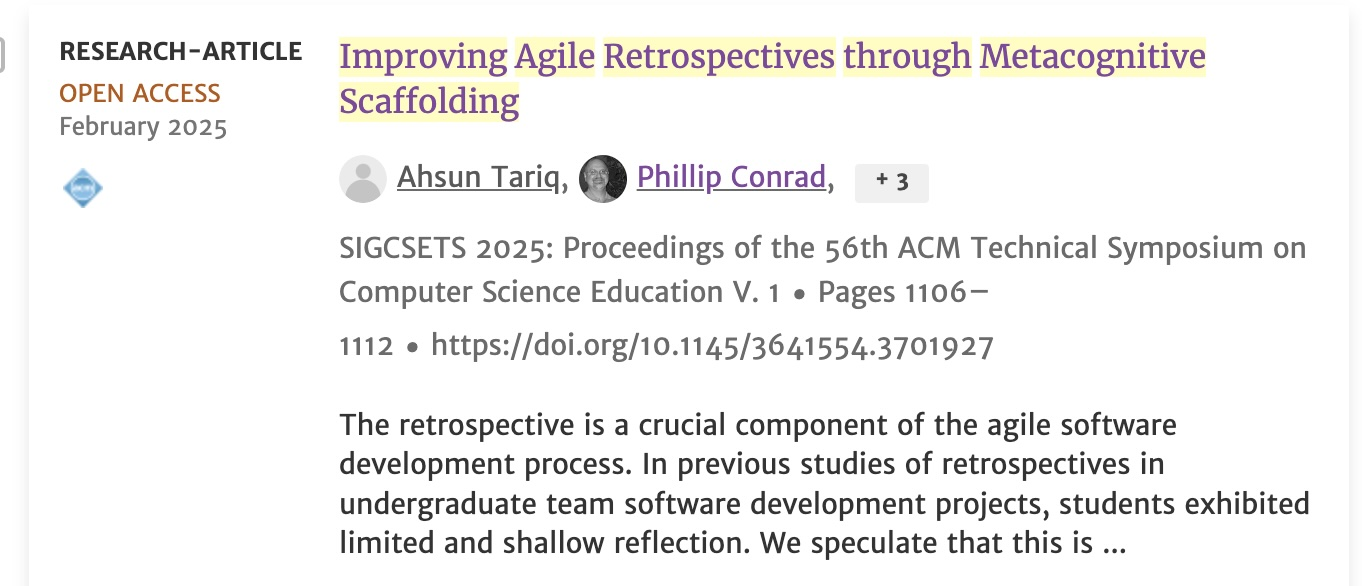

A prior study (of students at UCSB) had shown that when students do these retrospective meetings in software engineering classes, most of their observations are not very insightful or deep.  We could call them "shallow reflections".

The study looked at whether adding "metacognitive scaffolding" (a fancy way to saw "more detailed instructions and examples") could improve the depth of students reflections, possibly resulting in improved peformance and improved learning.

Returning to our textbook's framing of an observational study, here are the three parts:

| From Chapter 2 of our text | From the Tariq et al. paper |
|----------------------------|-----------------------------|
| observations on a group of individuals |  depth of reflections of students in CMPSC 156 doing Agile Retrospectives |
| a factor of interest called a treatment | "metacognitive scaffolding" (detailed instructions and examples) |
| an outcome measured on each individual | the depth of reflection of students in CMPSC 156 doing Agile Retrospectives |

#### Control vs. Experimental groups, and Treatments

The key here is that there's:
* A control group that does *not* get the treatment
* An experimental group that *does* get the treatment

And to the extent possible, we want there to be *no other differences* between the two groups.

This is, of course *impossible* to acheive perfectly.  The two groups are made of of human beings.  

Suppose that we *do* see (as, in fact, we did) a dramatic improvement in the depth of reflection in the treatment group, as opposed to the control group.

Is it *because* of the intervention?

*We cannot know with absolute certainty*.

### Threats to Validity

There are hundreds of other factors that might impact the depth of reflection in an assignment (we call these "threats to validity"):

* Maybe the groups in the treatment group, randomly happen to be students that are really busy with other classes, so they are "phoning it in" in CMPSC 156.
* Or alternatively, maybe some of those students are about to apply to the BS/MS program in CS, and want a letter of recommendation, so they are trying extra hard.
* Maybe in some groups there's a flu bug spreading from one group member to another, so that those groups are just more tired/fatigued, and do more shallow reflection in a given period of time.

### Random Chance as a threat to validity

Or maybe it's *random chance*:

* Some students are always going to be more motivated than others.
* Perhaps by *random chance*, the students in the experimental group just *happened* to be more motivated students, and would have done deeper reflections *no matter what* instructions you gave them.

We could go on, and on with speculating about *other factors* that might have resulted in one group showing deeper reflections than another.    We may never know with absolute certainty whether the intervention *caused* the improvement in performance.

BUT: what we can do, is use math and statistics to determine how *likely* it is than an outcome is due to random chance, as opposed to being associated with the treatment.

We'll come back to this when we talk about p values later in the course.


### Association vs. Causality

* "*Any relation* between the treatment and the outcome is called an association."
* "If the treatment *causes* the outcome to occur, then the association is *causal*.


## Sections 2.1, 2.2: John Snow, and Cholera

Sections 2.1, 2.2 describe how John Snow investigated the cause of Cholera outbreaks in London in the 1850s.

* Miasma theory of disease (airborne) vs. something in the water.
* Mapping where the deaths occurred, and whether they didn't,
* Showing evidence that Cholera had to do with water and sewage, not "bad smells"

They are a fascinating read, so if you haven't read them yet, please do.

There may be some questions on upcoming labs or worksheets about this section.

### Section 2.3: Confounds

Does coffee cause cancer?

* "Studies in the 1960’s showed that coffee drinkers had higher rates of lung cancer than those who did not drink coffee."
* "Because of this, some people identified coffee as a cause of lung cancer."

But coffee does not cause lung cancer. 
* The analysis contained a confounding factor—smoking.
* In those days, coffee drinkers were also likely to have been smokers, and smoking does cause lung cancer.
* Coffee drinking was associated with lung cancer, but it did not cause the disease.

We can come up with other examples:

Suppose we observe that people that take yoga classes have lower rates of heart disease, high blood pressure, and obesity?
* Do Yoga classes improve health outcomes?
* Or, are people that are already *healthy* more likely to seek out Yoga classes 
* Or is having the money to pay for yoga classes associated with having money to pay for better food, living in neighborhoods with less pollution?
 
Suppose we observe that students from Ivy League universities have better career outcomes, is that because they got a better education?
* Or, is their dispropotionate success a result of "perceptions" about their education, which gives them an advantage unrelated to their actual knowledge and skills?

In summary: 
* correlation does not imply causation.

## Section 2.4: Randomization

One way to reduce confounds is to randomly assign research subjects to the control or experimental group.  

* Randomized Controlled Experiments (RCE's) assign participants to control or experimental group *randomly*.

The book talks about a study in Mexico from the 1990s as an example of a Randomized Controlled Experiment.  
* The study wanted to see if giving money to poor families as an incentive for school attendance and preventative health would be an effective way to improve education and health outcomes.
* So they gave money to families in some villages, and not others.
* The key is that *which villages* they gave money to was chosen *randomly*.
* They didn't decide up front which villages to give money to, or not, based on some matter of convenience, or preference.  If they had, then whatever factors influenced their decision (consciously or unconsciously) to put some villages in control vs. treatment, might have introduced *confounds* into the study.

### Section 2.5 (Endnote)

There's a list of vocabulary words in Section 2.5 
* <https://inferentialthinking.com/chapters/02/5/endnote.html> 

It starts with these, but there are far more:

* observational study
* treatment
* outcome
* association
* causal association
* etc.

Please read through the chapters if you haven't yet, and check your understanding to make sure you are familiar with each of these vocabulary words.



## Histograms (Section 7.2)

Suppose we want to know the distribution of class sizes in a given department at UCSB, i.e. how many small classes, vs. how many large classes there are.

We might even to compare the distribution of class sizes between among several departments e.g. CMPSC, PSTAT, MATH.

A histogram can help us visualize that.

Section 7.2 of your book covers how to make histograms. For today, I'm going to give a quick overview; we'll return to this later in more depth.

First, let's load our course data

In [8]:
courseTable = Table.read_table("data/ucsb-s25-courses.csv")

In [9]:
courseTable

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan
CMPSC 5A -1,24,"C (L&S), QNT (L&S)",nan,30,20252,105,nan
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",TANNA A A,77,20252,100,Closed
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,101,Closed
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,25,20252,102,Closed
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,103,Closed


We'll add our usual functions to add columns for dept, coursenum, suffix:

In [13]:
def courseIdToDept(courseId):
    return courseId[0:8].strip()

def courseIdToCourseNum(courseId):
    return courseId[8:13].strip()

def courseIdToSuffix(courseId):
    return courseId[14:].strip()

def isLecture(sectionNum):
    # if section number is divisible by 100, it's a lecture
    return sectionNum % 100 == 0

In [14]:
courses = courseTable.with_columns(
    "dept", courseTable.apply(courseIdToDept, 0),
    "courseNum", courseTable.apply(courseIdToCourseNum, 0),
    "suffix", courseTable.apply(courseIdToSuffix, 0),
    "isLecture", courseTable.apply(isLecture, "SECTION")
)


In [15]:
courses

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1,True
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan,CMPSC,5A,1,False
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan,CMPSC,5A,1,False
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan,CMPSC,5A,1,False
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan,CMPSC,5A,1,False
CMPSC 5A -1,24,"C (L&S), QNT (L&S)",nan,30,20252,105,nan,CMPSC,5A,1,False
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",TANNA A A,77,20252,100,Closed,CMPSC,5B,1,True
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,101,Closed,CMPSC,5B,1,False
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,25,20252,102,Closed,CMPSC,5B,1,False
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,103,Closed,CMPSC,5B,1,False


In [35]:
csLectures = courses \
   .where("dept",are.equal_to("CMPSC")) \
   .where("isLecture",are.equal_to(True)) \
   .where("STATUS",are.not_equal_to("Closed")) \
  

In [36]:
csLectures

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1,True
CMPSC 9 -1,166,nan,KHARITONOVA Y,300,20252,100,nan,CMPSC,9,1,True
CMPSC 24 -1,146,nan,MIRZA D,149,20252,100,nan,CMPSC,24,1,True
CMPSC 32 -1,133,nan,NASIR N,150,20252,100,nan,CMPSC,32,1,True
CMPSC 99 -1,0,nan,nan,0,20252,100,nan,CMPSC,99,1,True
CMPSC 130A -1,91,nan,NASIR N,150,20252,100,nan,CMPSC,130A,1,True
CMPSC 130B -1,90,nan,SINGH A K,150,20252,100,nan,CMPSC,130B,1,True
CMPSC 138 -1,45,nan,EL ABBADI A,150,20252,100,nan,CMPSC,138,1,True
CMPSC 154 -1,112,nan,BALKIND J M,150,20252,100,nan,CMPSC,154,1,True
CMPSC 156 -1,96,nan,CONRAD P T,96,20252,100,nan,CMPSC,156,1,True


Now let's trim that down to just the columns we are interested in

In [39]:
csLectures = csLectures.select("COURSEID","ENROLLED","MAXENROLL")
csLectures

COURSEID,ENROLLED,MAXENROLL
CMPSC 5A -1,128,150
CMPSC 9 -1,166,300
CMPSC 24 -1,146,149
CMPSC 32 -1,133,150
CMPSC 99 -1,0,0
CMPSC 130A -1,91,150
CMPSC 130B -1,90,150
CMPSC 138 -1,45,150
CMPSC 154 -1,112,150
CMPSC 156 -1,96,96


Now, among all of these courses, what is the range of enrollments?

Here's how we produce histograms of various kinds.

## First step: binning the data

Our first step will be to bin the data.  Suppose we are interested in three bins:

* Courses of 0 to 9 students
* Courses of 10 to 29 students
* Courses of 30 to 49 students
* Courses of 50 to 99 students
* Courses of 100 to 299 students
* Courses of 300 or more


We can first bin our data like this:

In [45]:
myBins = make_array(0, 10, 30, 50, 100, 300)
bin_counts = csLectures.bin('ENROLLED', bins=myBins)
bin_counts

bin,ENROLLED count
0,66
10,12
30,6
50,7
100,7
300,0


We can check this against our data by sorting by 'ENROLLED' and showing the whole table so that we count:

In [44]:
csLectures.sort("ENROLLED",descending=True).show()

COURSEID,ENROLLED,MAXENROLL
CMPSC 9 -1,166,300
CMPSC 165B -1,149,150
CMPSC 24 -1,146,149
CMPSC 165A -1,137,150
CMPSC 32 -1,133,150
CMPSC 5A -1,128,150
CMPSC 154 -1,112,150
CMPSC 156 -1,96,96
CMPSC 170 -1,94,105
CMPSC 130A -1,91,150


Looks like it checks out!  So now, let's make a histogram of that.

The simplest way to make a historgram is to just use all of the default options:

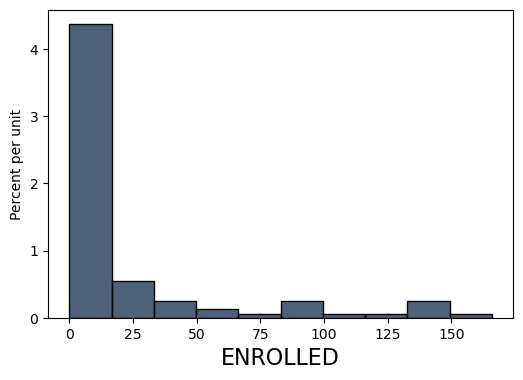

In [46]:
csLectures.hist("ENROLLED")

When we do that, the software chooses the bin size for us, but it may not be a bin size that makes a lot of sense for our data.

Instead, we can specify the bins we want to use:

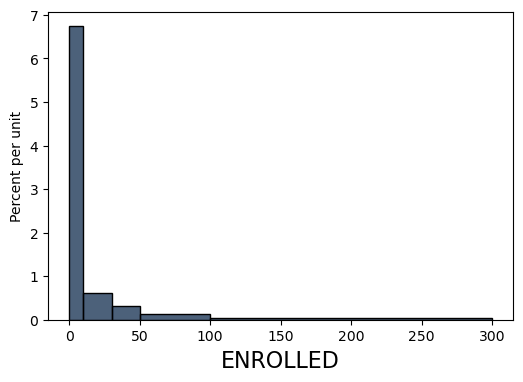

In [47]:
csLectures.hist("ENROLLED",bins=myBins)

The y axis of this graph is a little strange.  The units are "percent per unit".  This is because the bin sizes are unequal. 

This is a bit challenging to grasp, we we'll return to it later.

Here's a histogram of the enrollment sizes of all the courses that are lectures and not closed:

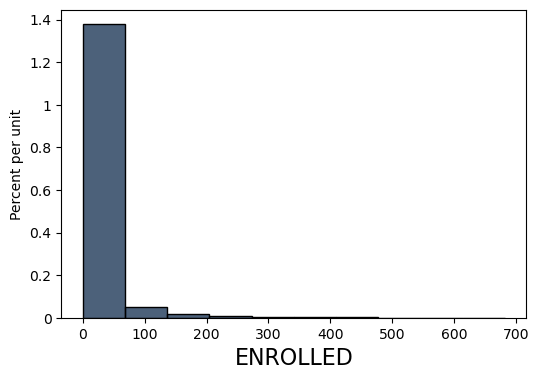

In [54]:
allOpenLectures = courses \
  .where("STATUS", are.not_equal_to("Closed")) \
  .where("isLecture", are.equal_to(True))
allOpenLectures.hist("ENROLLED")

Here's that specifying a bin width of 25:

In [55]:
binsOf25 = np.arange(0,700,25)

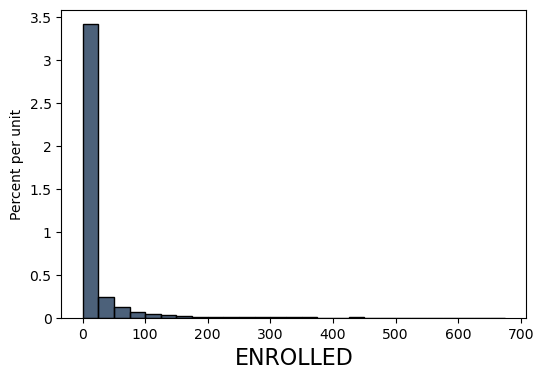

In [56]:
allOpenLectures.hist("ENROLLED", bins=binsOf25)

We'll come back and talk more about histograms in a later lecture, and start to talk about overlaid graphs (7.3).

# Continuing ic12

Ok, for today's participation activity, we'll pick up from where we left off last time.

First, let's review WHY
* It's to make sure that you are set up for success with the group projects (midterm and final).

Please locate your Google Drive folder shared with you called "cs5a-s25-ic12".

Try here: 
<https://docs.google.com/spreadsheets/d/1Nvers9tHiiH3Cwtyxp8WFNPEOvhy3kPDLZqtZLgaGLA/edit?usp=sharing>

If you joined a week 4 project group, you should have one.

If you don't, IN A MOMENT, come line up at the front desk, and I'll help you find it.

Otherwise, open it up.

You should see:
* A google sheet with your group members
* A Google co-lab notebook for *each* group member
* A "FINAL" notebook.

Open up *just your notebook* and do the exercises inside.

Next Tuesday, we'll talk through the part where we combine the groups work into one notebook, but for today, just the five things inside your individual notebook is all you need.

It's the *same stuff* from ic10, but I know not everyone finished on Tuesday:

* So if you already did it there, you can just copy/paste your answers.
* But please *do that* so that we have this all in one place to be ready for next Tuesday.


When you've finished all of the work in your individual notebook, you are free to go.

Please get as much done as you can before 3:30pm today though.

Note that we'll be grading this sometime this evening, so there is a *little bit* of a grace period; if you get it done before it's graded, we'll accept it.

But the intention is to do it today in class, so finish it as soon as you can.